In [1]:
import os
from tensorflow import keras # neural network
import cv2  # computer vision
import numpy as np  # numpy arrays
import matplotlib.pyplot as plt  # visualisation

## Preparing dataset

In [2]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = keras.utils.normalize(train_images)
test_images = keras.utils.normalize(test_images)

## Building model

In [3]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (5, 5), padding="same", input_shape=[28, 28, 1]),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(64, (5, 5), padding="same"),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

c:\Users\gerle\OneDrive\Desktop\number-recognition\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Training model

In [4]:
model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.9210 - loss: 0.2594 - val_accuracy: 0.9800 - val_loss: 0.0605
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.9832 - loss: 0.0519 - val_accuracy: 0.9816 - val_loss: 0.0542
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.9874 - loss: 0.0387 - val_accuracy: 0.9879 - val_loss: 0.0394
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9910 - loss: 0.0294 - val_accuracy: 0.9871 - val_loss: 0.0472
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9933 - loss: 0.0209 - val_accuracy: 0.9874 - val_loss: 0.0496
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9923 - loss: 0.0270 - val_accuracy: 0.9883 - val_loss: 0.0521
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.9939 - loss: 0.0209 - val_accuracy: 0.9855 - val_loss: 0.0631
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.9934 -

In [5]:
model.evaluate(test_images,  test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9849 - loss: 0.0802


[0.06905674934387207, 0.988099992275238]

In [6]:
model.save("digits.keras")

## Loading model

In [7]:
model = keras.models.load_model("digits.keras")

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,606,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,990,112 (19.04 MB)

 Trainable params: 1,663,370 (6.35 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,326,742 (12.69 MB)

In [9]:
model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9849 - loss: 0.0802


[0.06905674934387207, 0.988099992275238]

## Processing images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
This digit is probably a(n) 2!


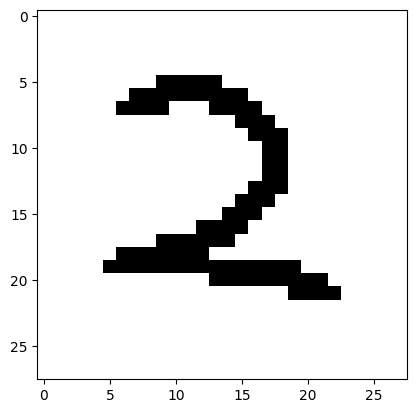

In [10]:
if os.path.isfile("number.png"):
    img = cv2.imread("number.png")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = np.invert(np.array([img]))

    prediction = model.predict(img)
    print(f"This digit is probably a(n) {np.argmax(prediction)}!")

    plt.imshow(img[0], cmap=plt.cm.binary)
    plt.show()